## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 5**. Going through these materials before attempting this assignment is highly recommended.

You are going to work with the **EMNIST** dataset for *image recognition task*. This dataset can be installed with the command <kbd>pip install emnist</kbd>. It has the exact same format as MNIST (grayscale images of 28 × 28 pixels), but the images represent handwritten letters rather than handwritten digits, so the problem is more challenging than MNIST.

### <span style="color:#0b486b">Question 2.1: Load the EMNIST datasets and process data</span> 


<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

We first use functions in the package **emnist**, namely <kbd>extract_training_samples</kbd> and <kbd>extract_test_samples</kbd>, to load the training and testing sets. We also want to encode labels using an ordinal encoding scheme.

In [2]:
import numpy as np
from emnist import extract_training_samples, extract_test_samples
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the training data and testing data from the EMNIST dataset for letters.
X_train_raw, y_train_raw = extract_training_samples("letters")
X_test_raw, y_test_raw = extract_test_samples("letters") 
# Print the shape of the training and testing data set.
print(X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)

(124800, 28, 28) (124800,) (20800, 28, 28) (20800,)


In [4]:
le = LabelEncoder()     # Create an instance of the LabelEncoder class.
# Encode the labels in the training dataset and assign a numerical value to each class in y_train_raw.
y_train_full = le.fit_transform(y_train_raw)
# Encode the labels in the testing dataset and assign a numerical value to each class in y_test_raw using the same numerical values in y_train_raw.
y_test = le.transform(y_test_raw) 

class_ids = np.unique(y_train_full)     # Get the unique class labels that exist in the training dataset.
n_classes = len(class_ids)              # Calculate the number of unique classes (number of classes).
print(class_ids)                        # Print the unique class labels found in the training dataset.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


The shape of training and testing data are $(num\_train, 28, 28)$ and $(num\_test, 28, 28)$, where $num\_train$ and $num\_test$ are number of training and testing images respectively. We next convert them to arrays of vectors which have shape $(num\_train, 784)$ and $(num\_test, 784)$.

In [5]:
# Calculate the number of samples in the training and testing dataset.
num_train = X_train_raw.shape[0]
num_test = X_test_raw.shape[0]

# Reshape the training and testing dataset
# Reshapes the datasets into a 2D array with 'num_train' rows and -1 columns, where -1 means that the number of columns is inferred based on the original shape
X_train_full = X_train_raw.reshape(num_train, -1)
X_test = X_test_raw.reshape(num_test, -1)

# Print the shapes of the reshaped training and testing data and labels
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(124800, 784) (124800,)
(20800, 784) (20800,)


### <span style="color:#0b486b">Question 2.2: Split data into training, validation, and testing datasets</span>

<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

You need to write the code to address the following requirements:
- Use $10 \%$ of `X_train_full`, `y_train_full` for validation and the rest of `X_train_full`, `y_train_full` for training. This splits `X_train_full` and `y_train_full` into `X_train`, `y_train` ($90 \%$) and `X_val`, `y_val` ($10 \%$).
- Finally, scale the pixels of `X_train`, `X_val`, and `X_test` to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [6]:
from sklearn.model_selection import train_test_split

# Split the training dataset into training and validation sets with 10% of the data used for validation.
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.1) 
# Normalize the pixel values in the datasets by dividing them by 255 to scale them between 0 and 1.
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

print(X_train.shape, y_train.shape)     # Print the shapes of the training data and labels.
print(X_val.shape, y_val.shape)         # Print the shapes of the validation data and labels.
print(X_test.shape, y_test.shape)       # Print the shapes of the test data and labels.

# Print the minimum and maximum pixel values in the training, validation, and test datasets.
print(X_train.min(), X_train.max(), X_val.min(), X_val.max(), X_test.min(), X_test.max())

(112320, 784) (112320,)
(12480, 784) (12480,)
(20800, 784) (20800,)
0.0 1.0 0.0 1.0 0.0 1.0


### <span style="color:#0b486b">Question 2.3: Visualize some images in the training set with labels</span>

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to **randomly** show $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure.

<img src="Figures/emnist_grid.png" width="450" align="center"/>

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

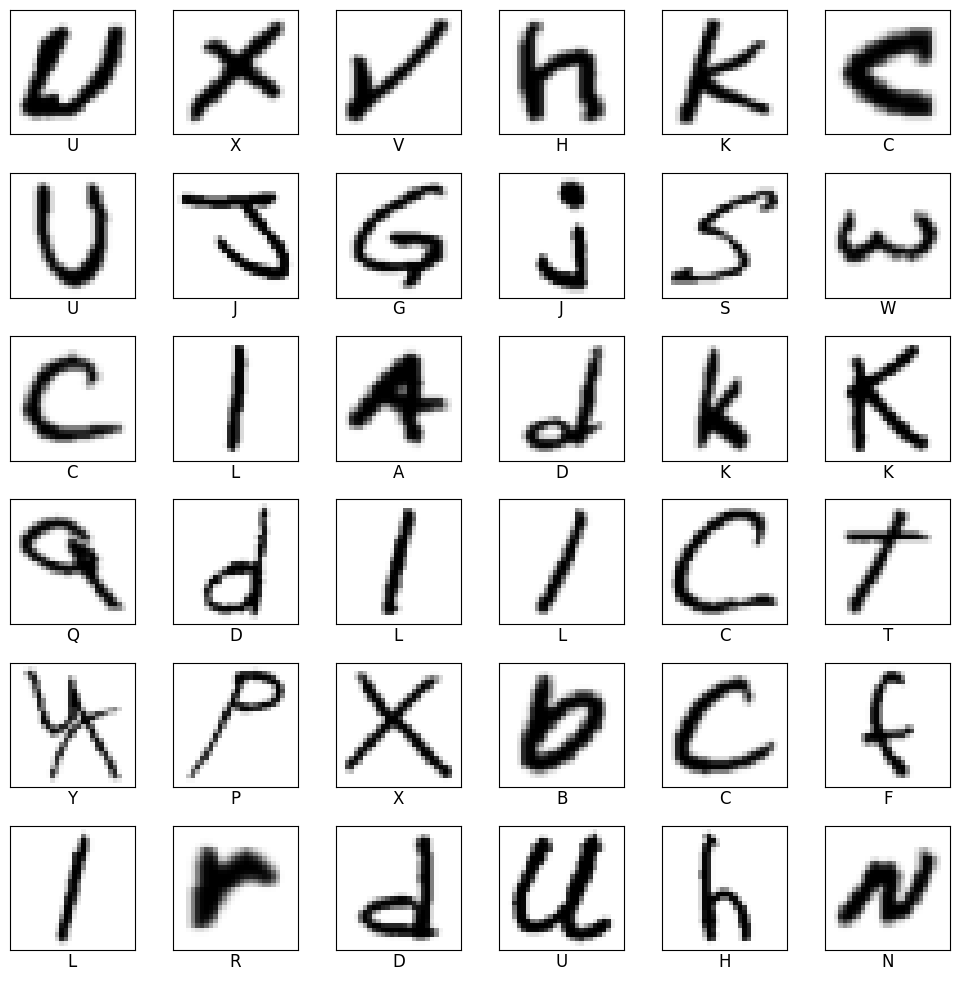

In [8]:
# From the full training dataset, generate 36 random indices.
random_indices = np.random.choice(X_train_full.shape[0], size = 36, replace = False)

# Based on the selected randomised indices, extract 36 random labels and images.
random_labels = y_train_full[random_indices]
random_images = X_train_full[random_indices]

# Create a new figure of size 10x10 with 6x6 grid axes.
figure, axes = plt.subplots(6, 6, figsize = (10, 10))

# Loop through each subplot and display an image with its corresponding label
for i, ax in enumerate(axes.flat):
    # Set the title of the subplot with a character label ('A', 'B', etc.)
    ax.set_title(chr(ord('A') + random_labels[i]), y = -0.20)
    
    # Display the image in black and white using a binary colormap
    ax.imshow(random_images[i].reshape(28, 28), cmap = "binary")
    
    # Remove all labels on the x and y axis.
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Pad the sides of each subplot.
figure.tight_layout(pad = 1.5)

# Display the figure containing the grid of images
plt.show()

### <span style="color:#0b486b">Question 2.4: Write code for the feed-forward neural net using TF 2.x</span>

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [9]:
import tensorflow as tf
random_seed = 3181
tf.random.set_seed(random_seed)

In [10]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
# Import Adam optimiser.
from keras.optimizers import Adam
# Import Sequential and Dense from keras.models.
from keras.models import Sequential
from keras.layers import Dense

# Build the neural network model
fnn_model = Sequential()
# Add the first layer with input dimension being 784 and the activation function being relu.
fnn_model.add(Dense(20, input_dim = 784, activation = "relu"))
# Add the second layer with the activation function being relu.
fnn_model.add(Dense(40, activation = "relu"))
# Add the output layer with the activation function being softmax.
fnn_model.add(Dense(26, activation = "softmax"))

# Compile the model with an optimizer Adam with learning_Rate 0.001 and loss function
fnn_model.compile(optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")

# Train the model on the training data for 20 epochs
his = fnn_model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_val, y_val))

# Evaluate the trained model on the test set
test_loss, test_acc = fnn_model.evaluate(X_test, y_test)
# Print the test loss and accuracy.
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/20
3510/3510 [==============================] - 5s 1ms/step - loss: 1.1443 - accuracy: 0.6641 - val_loss: 0.8314 - val_accuracy: 0.7558
Epoch 2/20
3510/3510 [==============================] - 4s 1ms/step - loss: 0.7690 - accuracy: 0.7722 - val_loss: 0.6994 - val_accuracy: 0.7903
Epoch 3/20
3510/3510 [==============================] - 4s 1ms/step - loss: 0.6732 - accuracy: 0.7994 - val_loss: 0.6412 - val_accuracy: 0.8090
Epoch 4/20
3510/3510 [==============================] - 4s 1ms/step - loss: 0.6260 - accuracy: 0.8125 - val_loss: 0.6148 - val_accuracy: 0.8172
Epoch 5/20
3510/3510 [==============================] - 4s 1ms/step - loss: 0.5948 - accuracy: 0.8204 - val_loss: 0.6016 - val_accuracy: 0.8242
Epoch 6/20
3510/3510 [==============================] - 3s 985us/step - loss: 0.5725 - accuracy: 0.8275 - val_loss: 0.5715 - val_accuracy: 0.8299
Epoch 7/20
3510/3510 [==============================] - 3s 964us/step - loss: 0.5560 - accuracy: 0.8320 - val_loss: 0.5494 - val_accur

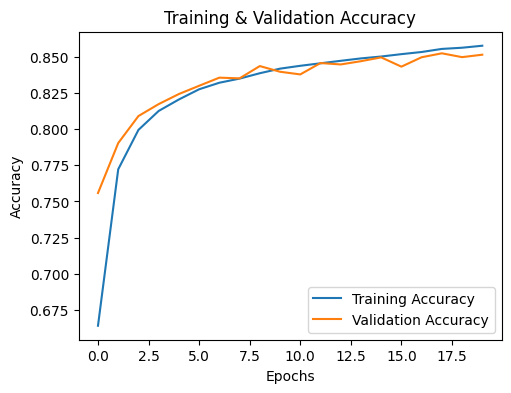

In [11]:
# Plot Training & Validation Accuracy.
# Create a figure with a specific size (12 units wide and 4 units tall).
plt.figure(figsize = (12, 4))
# Create a subplot with 1 row, 2 columns, and select the 1st subplot.
plt.subplot(1, 2, 1)

# Plot the training accuracy over epochs and label it as "Training Accuracy".
plt.plot(his.history["accuracy"], label = "Training Accuracy")
# Plot the validation accuracy over epochs and label it as "Validation Accuracy".
plt.plot(his.history["val_accuracy"], label = "Validation Accuracy")

# Label the x-axis and y-axis.
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Set the title of this subplot as "Training & Validation Accuracy".
plt.title("Training & Validation Accuracy")

# Display a legend indicating which line represents which data.
plt.legend()

# Display the graph.
plt.show()

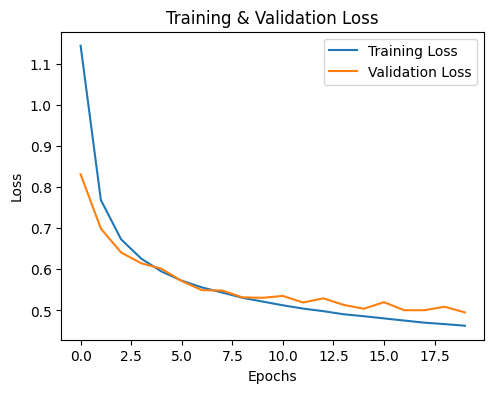

In [12]:
# Plot Training & Validation Loss.
# Create a figure with a specific size (12 units wide and 4 units tall).
plt.figure(figsize = (12, 4))
# Create a subplot with 1 row, 2 columns, and select the 2nd subplot.
plt.subplot(1, 2, 2)

# Plot the training loss over epochs and label it as "Training Loss".
plt.plot(his.history["loss"], label = "Training Loss")
# Plot the validation loss over epochs and label it as "Validation Loss".
plt.plot(his.history["val_loss"], label = "Validation Loss")

# Label the x-axis and y-axis.
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Set the title of the plot as "Training & Validation Loss".
plt.title("Training & Validation Loss")

# Display a legend indicating which line represents which data.
plt.legend()

# Display the graph.
plt.show()

### <span style="color:#0b486b">Question 2.5: Tuning hyper-parameters with grid search</span>
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

# Import ParameterGrid from the sklean.model_selection.
from sklearn.model_selection import ParameterGrid

def create_model(n1 = 20, n2 = 20, act = "sigmoid"):
    """
    This function creates a Neural Network model with customizable architecture and hyperparameters based on input parameters.
    It consists of an input layer, two hidden layers, and an output layer for multi-class classification.
    """
    fnn_model = Sequential()    # Create a sequential model.
    # Add the first hidden layer using the parameters provided. Default set input dimension to 784.
    fnn_model.add(Dense(n1, input_dim = 784, activation = act))
    # Add the second hidden layer using the parameters provided.
    fnn_model.add(Dense(n2, activation = act))
    # Add the output layer with 26 neurons with the activation function being softmax.
    fnn_model.add(Dense(26, activation = "softmax"))
    
    # Compile the model with an optimizer Adam with learning_Rate 0.001 and loss function.
    fnn_model.compile(optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")
    
    return fnn_model    # Return the compiled model.

# Initialize variables to keep track of the best validation accuracy and corresponding hyperparameters.
best_validation_result = 0
best_hyperparmeters = None

# Define hyperparameters and their potential values.
parameter_grid = {
    "n1": [20, 40],
    "n2": [20, 40],
    "act": ["sigmoid", "tanh", "relu"]
}

# Define a grid of hyperparameters to explore for a neural network model using the hyparameters defined above.
parameter_grid = list(ParameterGrid(parameter_grid))

i = 0
# Loop through each set of hyperparameters defined in the parameter grid.
while i < len(parameter_grid):
    hyperparameter = parameter_grid[i]   # Get the current parameter within the parameter grid
    
    # Call the create_model function using the hyperparameters set as parameters.
    fnn_model = create_model(**hyperparameter)

    # Train the model on the training data, using the specified batch size (32) and number of epochs which is 20.
    # verbose = False to disable output for each epoch.
    his = fnn_model.fit(X_train, y_train, verbose = False, epochs = 20, batch_size = 32, validation_data = (X_val, y_val))
    
    # Calculate the average validation accuracy from the training history.
    validation_accuracy = np.mean(his.history["val_accuracy"])
    
    # Check if the current model has a higher validation accuracy than the previous best.
    if validation_accuracy > best_validation_result:
        best_validation_result = validation_accuracy    # If so, set the best_validation_result to the current model validation accuracy.
        best_hyperparmeters = hyperparameter            # Set the best_hyperparmeters to the current parameters.

    # Print the validation accuracy and corresponding hyperparameters.
    print("Validation Accuracy: {0} using {1} hyperparameters".format(validation_accuracy, hyperparameter))
    
    i += 1      # Increment i by one.
    
# Print the best validation accuracy and its corresponding hyperparameters.
print("Best Validation Accuracy: {0} using {1} hyperparameters".format(best_validation_result, best_hyperparmeters))

Validation Accuracy: 0.7568629831075668 using {'act': 'sigmoid', 'n1': 20, 'n2': 20} hyperparameters
Validation Accuracy: 0.7789983928203583 using {'act': 'sigmoid', 'n1': 20, 'n2': 40} hyperparameters
Validation Accuracy: 0.8174679458141327 using {'act': 'sigmoid', 'n1': 40, 'n2': 20} hyperparameters
Validation Accuracy: 0.8350761204957962 using {'act': 'sigmoid', 'n1': 40, 'n2': 40} hyperparameters
Validation Accuracy: 0.7910977572202682 using {'act': 'tanh', 'n1': 20, 'n2': 20} hyperparameters
Validation Accuracy: 0.8086658596992493 using {'act': 'tanh', 'n1': 20, 'n2': 40} hyperparameters
Validation Accuracy: 0.8370753228664398 using {'act': 'tanh', 'n1': 40, 'n2': 20} hyperparameters
Validation Accuracy: 0.8468108952045441 using {'act': 'tanh', 'n1': 40, 'n2': 40} hyperparameters
Validation Accuracy: 0.8025641083717346 using {'act': 'relu', 'n1': 20, 'n2': 20} hyperparameters
Validation Accuracy: 0.8336298078298569 using {'act': 'relu', 'n1': 20, 'n2': 40} hyperparameters
Validati

### <span style="color:#0b486b">Question 2.6: Experimenting with the **label smoothing** technique</span>
<div style="text-align: right"> <span style="color:red">[8 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

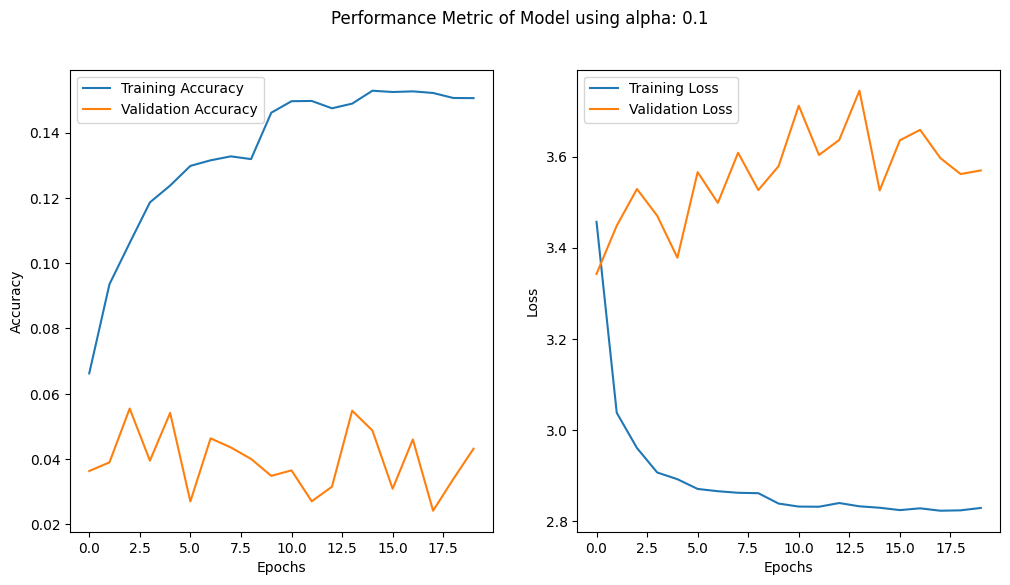

Validation Accuracy: 0.04317307844758034 using 0.1 alpha
650/650 [==============================] - 1s 1ms/step - loss: 3.9198 - accuracy: 0.0392
Test Loss: 3.9197840690612793
Test Accuracy: 0.039182692766189575



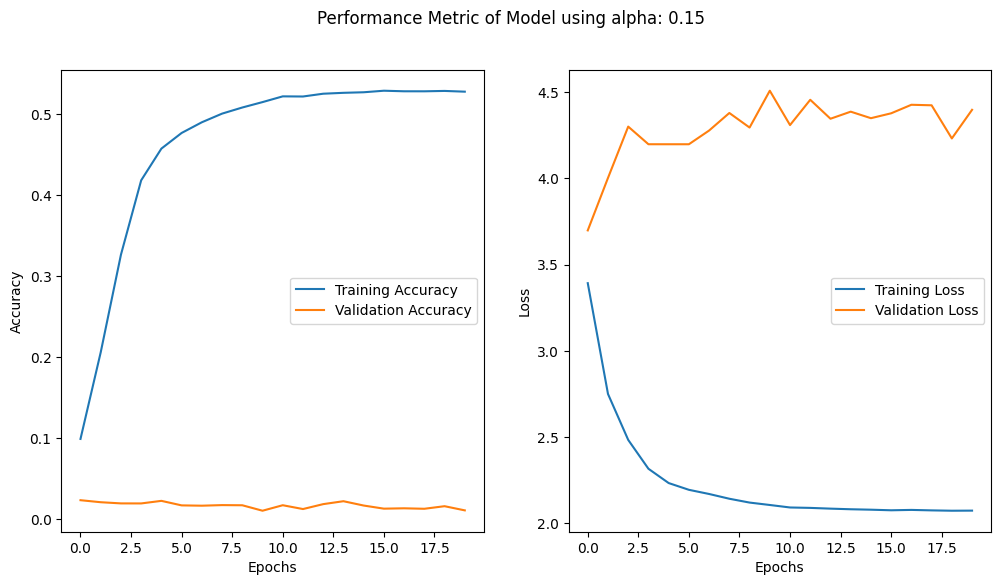

Validation Accuracy: 0.010817307978868484 using 0.15 alpha
650/650 [==============================] - 1s 1ms/step - loss: 4.0431 - accuracy: 0.0385
Test Loss: 4.043056964874268
Test Accuracy: 0.03846153989434242



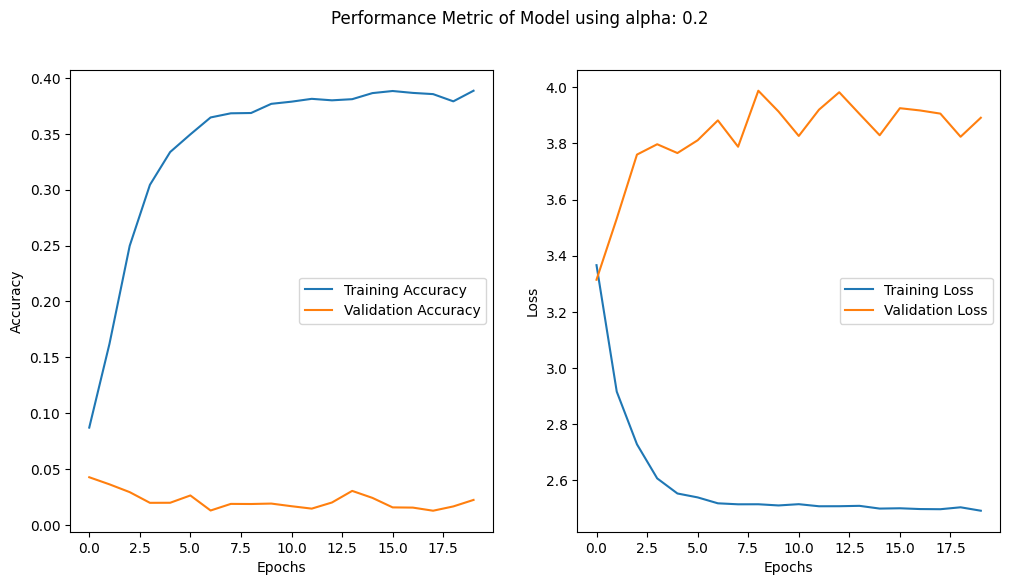

Validation Accuracy: 0.022451922297477722 using 0.2 alpha
650/650 [==============================] - 1s 1ms/step - loss: 3.3445 - accuracy: 0.0686
Test Loss: 3.3444628715515137
Test Accuracy: 0.06855769455432892

Best Validation Accuracy: 0.04317307844758034 using 0.1 alpha


In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

def label_smoothing_loss(y_true, y_pred):
    """
    Label smoothing function loss function.
    """
    # Cast the tensor to a float from an int.
    y_true = tf.cast(y_true, tf.float32)
    num_classes = y_true.shape[-1]
    # Calculate smoothed labels using this formula.
    smoothed_labels = (1 - alpha) * y_true + alpha /  tf.cast(num_classes, tf.float32)
    
    # Use categorical cross-entropy loss with smoothed labels and returned it.
    return tf.keras.losses.categorical_crossentropy(smoothed_labels, y_pred)

def create_model():
    """
    Method that creates the model of shape 784 and with 2 hidden layers. The first and second using the relu activation function and
    the output layer using softmax.
    """
    model = Sequential([
        Dense(40, activation = "relu", input_shape = (784,)),
        Dense(40, activation = "relu"),
        Dense(26, activation = "softmax")
    ])
    # Compile the model with the label smoothing loss function and using Adam optimiser with 0.001 learning rate.
    model.compile(Adam(learning_rate = 0.001), loss = label_smoothing_loss, metrics = ["accuracy"])
    return model

alphas = [0.1, 0.15, 0.2]       # List of alpha values to use.
best_validation_result = 0      # The best validation result. Default 0.
best_alpha = None               # The best alpha result. Default None.

# Loop through each alpha value and observe the performance metric of the model using that alpha value.
for alpha in alphas:
    # Create a new model for each alpha.
    model = create_model()
    # Train the model and validate its performance.
    his = model.fit(X_train_full, tf.one_hot(y_train_full, depth=26), epochs = 20, batch_size = 32, validation_data = (X_test_raw.reshape(X_test_raw.shape[0], -1), tf.one_hot(y_test_raw, depth=26)), verbose=False)

    # Get the validation accuracy from the training history.
    validation_accuracy = his.history["val_accuracy"][-1]
    
    # Check if the current model has a higher validation accuracy than the previous best.
    if validation_accuracy > best_validation_result:
        best_validation_result = validation_accuracy    # If so, set the best_validation_result to the current model validation accuracy.
        best_alpha = alpha                              # Update the best alpha to the current used alpha.

    # Create a figure with a specific size (12 units wide and 6 units tall).
    plt.figure(figsize = (12, 6))
    
    # Create a subplot with 1 row, 2 columns, and select the 1st subplot.
    plt.subplot(1, 2, 1)
    
    # Plot the training accuracy over epochs and label it as "Training Accuracy".
    plt.plot(his.history["accuracy"], label = "Training Accuracy")
    # Plot the validation accuracy over epochs and label it as "Validation Accuracy".
    plt.plot(his.history["val_accuracy"], label = "Validation Accuracy")
    
    # Set the x and y labels of the 1st subplot.
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    
    # Display the legend of the 1st subplot.
    plt.legend()
    
    # Select the 2nd subplot.
    plt.subplot(1, 2, 2)
    
    # Plot the training loss over epochs and label it as "Training Loss".
    plt.plot(his.history["loss"], label = "Training Loss")
    # Plot the validation loss over epochs and label it as "Validation Loss".
    plt.plot(his.history["val_loss"], label = "Validation Loss")
    
    # Set the x and y labels of the 2nd subplot.
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    
    # Display the legend of the 2nd subplot.
    plt.legend()
    
    # Display the title of each graph.
    plt.suptitle("Performance Metric of Model using alpha: {0}".format(alpha))
    # Show the graph.
    plt.show()
    
    # Print the validation accuracy and corresponding alpha used.
    print("Validation Accuracy: {0} using {1} alpha".format(validation_accuracy, alpha))
    
    # Convert the y test labels into one hot vectors and compare the model's performance with the test data
    y_onehot_test = tf.one_hot(y_test, depth = 26)
    test_loss, test_accuracy = model.evaluate(X_test, y_onehot_test)

    # Print the loss and accuracy of the tests.
    print("Test Loss: {0}".format(test_loss))
    print("Test Accuracy: {0}\n".format(test_accuracy))
    
# Print the best validation accuracy and its corresponding alpha used.
print("Best Validation Accuracy: {0} using {1} alpha".format(best_validation_result, best_alpha))

Based on these results above, the best performance is achieved when using label smoothing with alpha = 0.1, resulting in a validation accuracy of approximately 0.043. This outperforms the other two values of αlpha (0.15 and 0.2), both of which have lower validation accuracies.

The reason why alpha = 0.1 performs the best seems to be because it strikes a good balance between providing regularisation (by smoothing the labels) and preserving useful information from the original labels. Smaller values of alpha result in less smoothing, making the labels closer to the hard targets and potentially providing less regularisation. Conversely, larger values of alpha result in more aggressive smoothing, potentially making it harder for the model to learn meaningful patterns in the data.